# Quantum Teleportation | QTangle


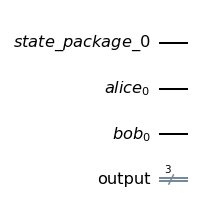

In [37]:
import numpy as np
from math import pi
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, Aer, execute ,IBMQ
from ibm_quantum_widgets import *

# Initialize the circuit components
state_package = QuantumRegister(1, name="state_package")
alice = QuantumRegister(1, name = "alice")
bob = QuantumRegister(1, name= "bob")
output = ClassicalRegister(3, name = "output")

# Initialize the circuit
circuit = QuantumCircuit(state_package, alice, bob, output)
circuit.draw(output="mpl")

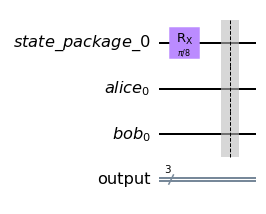

In [38]:
# Prepare state
circuit.rx(pi/8, state_package)
circuit.barrier()
circuit.draw(output="mpl")

[0.981+0.j    0.   -0.195j 0.   +0.j    0.   +0.j    0.   +0.j
 0.   +0.j    0.   +0.j    0.   +0.j   ]


/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


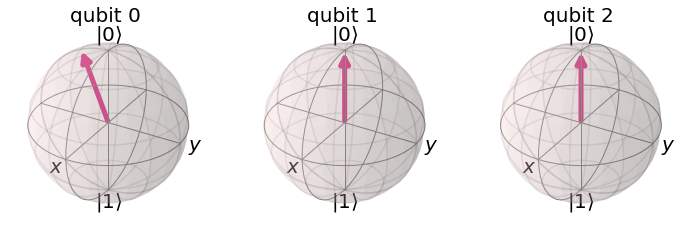

In [28]:
# Initial State

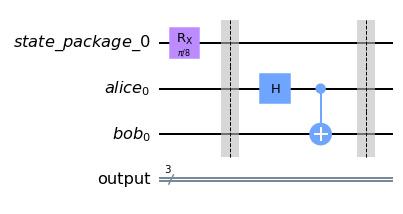

In [39]:
# Entanglement between Alice and Bob
circuit.h(alice)
circuit.cx(alice,bob)
circuit.barrier()

circuit.draw(output="mpl")

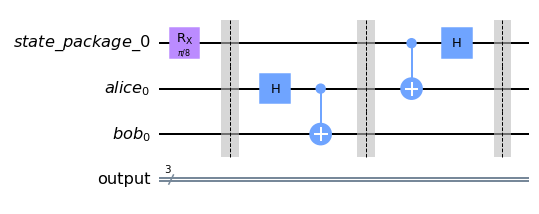

In [40]:
# Bell measurement
circuit.cx(state_package, alice)
circuit.h(state_package)
circuit.barrier()
circuit.draw(output="mpl")

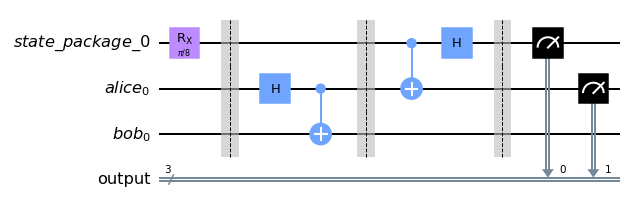

In [41]:
# Measure State
circuit.measure([state_package[0],alice[0]],[output[0],output[1]])
circuit.draw(output="mpl")

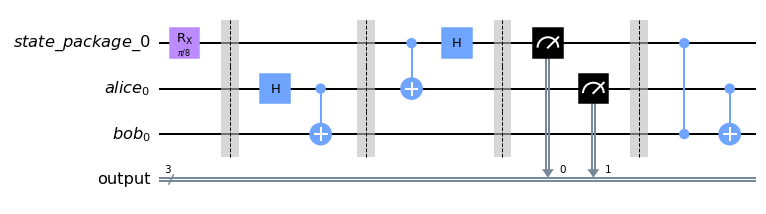

In [42]:
# Bob applies gates
circuit.barrier()
circuit.cz(state_package,bob)
circuit.cx(alice,bob)
circuit.draw(output="mpl")

In [43]:
backend = Aer.get_backend("aer_simulator")
circuit.save_statevector()
job = backend.run(circuit)
result = job.result()

outstate = result.get_statevector(decimals =3)
print(outstate)

[ 0.   +0.j     0.   +0.j     0.981+0.j    -0.   +0.j     0.   -0.j
 -0.   +0.j    -0.   -0.195j  0.   +0.j   ]


/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


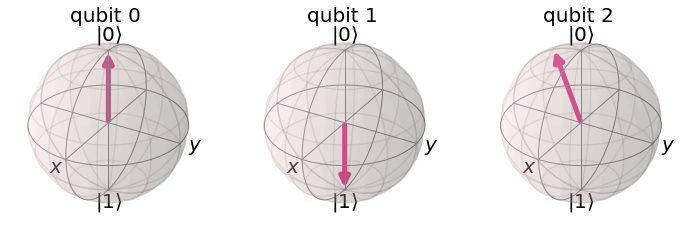

In [44]:
from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(outstate)